In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import statistics as st
from matplotlib.pyplot import figure

%matplotlib inline  

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
api_key = '00ef9804fcde0edd93b1b4821ee2f06a'
# api_key = 'c81352430e2fe3c941faf0814227562b'

data

In [4]:

''' Колонки '''
ticker = 'F'
# ticker = 'AAPL'



''' для фильтрации'''
filt_start_date = '1999'
filt_finish_date = '2022'


''' время '''
stime=f'{str(int(filt_start_date)-1)}-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'



In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df_market = get_data_from_ticker('^GSPC', stime, None, period)
df.tail(3)

,F
Date,
2022-12-01 00:00:00-05:00,11.63
2023-01-01 00:00:00-05:00,12.89
2023-02-01 00:00:00-05:00,13.63


change index

In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df_market  = change_index(df_market)
df.head(3)

,F
Date_index,
1998-01-01,8.822250
1998-02-01,9.867580
1998-03-01,11.306831


key_metrics

In [7]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr.head(3)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
2021,FY,34.162115,4.494362,3.95565,2.39539,12.426209,12.157103,12,12.157103,36.717615,77984143591.899994,196929143591.899994,4.347669,0.571979,4.93977,8.157337,1.607291,1.607291,1.444387,6.38924,12.474133,20.599283,0.230008,0.122589,1.843566,0.810835,3.859094,1.201362,0.641106,0.880136,0.005168,0.022468,0,0,0.00284,-0.394438,-0.045672,-1.044799,0.002237,35.062296,0.027197,0.069983,-30.030757,18269000000,47892000000,-99417000000,2.874853,48153500000,22276500000,11436500000,117.559978,71.149707,38.409826,3.104798,5.130028,9.502777,0.36969,-1.560261
2020,FY,32.002014,-0.321923,6.108482,4.663227,12.575132,7.724641,7.653914,7.724641,43.607853,41835688808.099998,179590688808.100006,-32.709686,0.329042,1.723832,2.258093,1.36317,1.36317,1.412498,10.822628,7.400004,9.693458,-0.030572,0.442852,3.627631,0.884716,8.301495,1.201169,-0.429797,-18.97498,0.014246,-0.465989,0,0,0.001504,-0.236598,-0.045161,-0.770015,0.001565,7.480083,-0.025919,-0.004793,-35.688271,19552000000,30409000000,-119706000000,5.311111,52394000000,22204000000,10808000000,150.410637,71.878636,34.987583,2.42669,5.078004,10.432272,-0.041675,-1.445255
2019,FY,39.249748,0.011833,4.440836,2.519386,8.723817,8.354733,8.248741,8.354733,42.105237,35112480794.400002,174329480794.399994,747.074059,0.225224,1.990616,3.508792,1.058083,1.058083,1.118213,9.508535,9.883184,17.420754,0.001339,0.284998,3.085973,0.871469,7.593378,1.16218,0.054558,375.297872,0.068038,50.829787,0,0,0.001802,-0.432678,-0.048954,-0.89894,0.001462,1.491427,0.003578,0.000182,-34.767623,15915000000,32764000000,-111260000000,4.722646,57641000000,21438500000,10797000000,147.236177,56.021063,29.228616,2.47901,6.515407,12.487762,0.001416,-1.92145


In [8]:
df_key_metr = df_key_metr.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_key_metr.index.to_list()
# index_years


In [9]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_market_prices = get_price_from_df(df_market, index_years)

In [10]:
df_key_metr[ticker] = list(stock_year_prices)
df_key_metr['SNP'] = list(stock_year_market_prices)
df_key_metr.drop('period', axis=1, inplace=True)

# df_key_metr.head(3)

financial_rations

In [11]:
df_fin_rat = fa.financial_ratios(ticker, api_key, period='annual')
df_fin_rat = df_fin_rat.T
df_fin_rat.head(3)

,period,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,netIncomePerEBT,ebtPerEbit,ebitPerRevenue,debtRatio,debtEquityRatio,longTermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,receivablesTurnover,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatio,dividendPaidAndCapexCoverageRatio,dividendPayoutRatio,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
2021,FY,1.201362,1.03063,0.226393,117.559978,38.409826,155.969805,71.149707,84.820098,0.159086,0.033174,0.130408,0.13156,-0.007312,0.069784,0.36969,0.027197,1.00883,3.931019,0.033174,0.810835,4.295492,0.648329,0.741926,0.641106,0.113181,5.297615,3.104798,5.130028,9.502777,2.147102,0.530437,3.95565,2.39539,12.426209,0.022468,0.115791,0.605562,0.113181,0.315507,-2.53525,-2.71068,0.022468,1.607291,1.607291,0.571979,4.347669,8.157337,4.93977,4.93977,0.002892,0.571979,0.005168,6.38924,1.607291
2020,FY,1.201169,1.053122,0.259723,150.410637,34.987583,185.39822,71.878636,113.519584,0.113194,-0.034669,-0.008777,-0.010059,-0.143369,-0.004786,-0.041675,-0.025919,1.146057,0.253176,-0.034669,0.884716,7.704464,0.783907,0.841549,-0.429797,0.148891,8.708407,2.42669,5.078004,10.432272,1.955039,0.47573,6.108482,4.663227,12.575132,-0.465989,0.190878,0.763402,0.148891,0.469729,-4.226576,-4.71609,-0.465989,1.36317,1.36317,0.329042,-32.709686,2.258093,1.723832,1.723832,0.009912,0.329042,0.014246,10.822628,1.36317
2019,FY,1.16218,0.993957,0.178372,147.236177,29.228616,176.464793,56.021063,120.443731,0.13603,0.003682,-0.004105,0.000301,1.13125,0.000182,0.001416,0.003578,-0.073438,-1.114983,0.003682,0.871469,6.789423,0.75526,0.825256,0.054558,0.11255,7.790779,2.47901,6.515407,12.487762,2.372943,0.603008,4.440836,2.519386,8.723817,50.829787,0.113143,0.567322,0.11255,0.324766,-2.31119,-3.364295,50.829787,1.058083,1.058083,0.225224,747.074059,3.508792,1.990616,1.990616,-7.551944,0.225224,0.068038,9.508535,1.058083


In [12]:

df_fin_rat = df_fin_rat.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_fin_rat.index.to_list()
# index_years

In [13]:
df_fin_rat[ticker] = list(stock_year_prices)
df_fin_rat['SNP'] = list(stock_year_market_prices)

# df_key_metr.head(3)

income_statement

In [14]:
df_inc_stat = fa.income_statement(ticker, api_key)
df_inc_stat = df_inc_stat.T
df_inc_stat.head(3)

,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,costAndExpenses,interestIncome,interestExpense,depreciationAndAmortization,ebitda,ebitdaratio,operatingIncome,operatingIncomeRatio,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
2021,USD,0000037996,2022-02-04,2022-02-03 18:24:07,2021,FY,136341000000,114651000000,21690000000,0.159086,0,0,0,11915000000,0,11915000000,126566000000,261000000,7055000000,5960000000,30822000000,0.226066,4523000000,0.033174,13257000000,17780000000,0.130408,-130000000,17937000000,0.13156,4.49,4.45,3991000000,4034000000,https://www.sec.gov/Archives/edgar/data/37996/...,https://www.sec.gov/Archives/edgar/data/37996/...
2020,USD,0000037996,2021-02-05,2021-02-04 18:58:09,2020,FY,127144000000,112752000000,14392000000,0.113194,0,0,0,10193000000,0,10193000000,122945000000,450000000,10256000000,7457000000,16594000000,0.130513,-4408000000,-0.034669,3292000000,-1116000000,-0.008777,160000000,-1279000000,-0.010059,-0.32,-0.32,3973000000,3973000000,https://www.sec.gov/Archives/edgar/data/37996/...,https://www.sec.gov/Archives/edgar/data/37996/...
2019,USD,0000037996,2020-02-05,2020-02-05 12:01:22,2019,FY,155900000000,134693000000,21207000000,0.13603,0,0,0,11161000000,0,11161000000,145854000000,809000000,10521000000,8490000000,18334000000,0.117601,574000000,0.003682,-1214000000,-640000000,-0.004105,-724000000,47000000,0.000301,0.01,0.01,3972000000,4004000000,https://www.sec.gov/Archives/edgar/data/37996/...,https://www.sec.gov/Archives/edgar/data/37996/...


In [15]:
df_inc_stat = df_inc_stat.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_inc_stat.index.to_list()
# index_years

In [16]:
df_inc_stat[ticker] = list(stock_year_prices)
df_inc_stat['SNP'] = list(stock_year_market_prices)
# df_inc_stat.drop('period', axis=1, inplace=True)

df_inc_stat.columns.to_list()

['reportedCurrency',
 'cik',
 'fillingDate',
 'acceptedDate',
 'calendarYear',
 'period',
 'revenue',
 'costOfRevenue',
 'grossProfit',
 'grossProfitRatio',
 'researchAndDevelopmentExpenses',
 'generalAndAdministrativeExpenses',
 'sellingAndMarketingExpenses',
 'sellingGeneralAndAdministrativeExpenses',
 'otherExpenses',
 'operatingExpenses',
 'costAndExpenses',
 'interestIncome',
 'interestExpense',
 'depreciationAndAmortization',
 'ebitda',
 'ebitdaratio',
 'operatingIncome',
 'operatingIncomeRatio',
 'totalOtherIncomeExpensesNet',
 'incomeBeforeTax',
 'incomeBeforeTaxRatio',
 'incomeTaxExpense',
 'netIncome',
 'netIncomeRatio',
 'eps',
 'epsdiluted',
 'weightedAverageShsOut',
 'weightedAverageShsOutDil',
 'link',
 'finalLink',
 'F',
 'SNP']

stock data detailed

In [17]:
stock_data_detailed = fa.stock_data_detailed(ticker, api_key)
stock_data_detailed

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
2023-01-31,13.39,13.57,13.25,13.51,13.51,81507736,81503131,0.12,0.896,13.44333,"January 31, 23",0.00896
2023-01-30,13.01,13.2,12.86,12.89,12.89,64464247,64463300,-0.12,-0.922,12.98333,"January 30, 23",-0.00922
2023-01-27,12.88,13.37,12.87,13.27,13.27,62071874,62066500,0.39,3.028,13.17,"January 27, 23",0.03028
2023-01-26,12.99,13.07,12.71,12.92,12.92,48912195,48912000,-0.07,-0.539,12.9,"January 26, 23",-0.00539
2023-01-25,12.6,12.85,12.49,12.79,12.79,37612816,37610200,0.19,1.508,12.71,"January 25, 23",0.01508
...,...,...,...,...,...,...,...,...,...,...,...,...
1972-06-07,2.124835,2.137,2.11267,2.11267,0.262268,675088,675088,-1.86257,-87.657,1.50398,"June 07, 72",-0.87657
1972-06-06,2.149165,2.157275,2.116725,2.124835,0.263778,1424158,1424158,-1.88539,-87.727,1.51259,"June 06, 72",-0.87727
1972-06-05,2.149165,2.16944,2.141055,2.149165,0.266799,5209582,5209582,-1.88237,-87.586,1.52576,"June 05, 72",-0.87586
1972-06-02,2.15322,2.173495,2.141055,2.149165,0.266799,1174468,1174468,-1.88642,-87.609,1.52712,"June 02, 72",-0.87609


dividents

In [18]:
stock_dividend = fa.stock_dividend(ticker, api_key)

percent of dividents

In [19]:
concat_divid_stock = pd.concat([stock_data_detailed, stock_dividend], axis=1, sort=False)

# concat_divid_stock[(concat_divid_stock.val > 0.5) & (concat_divid_stock.val2 == 1)]
concat_divid_stock = concat_divid_stock.dropna()
concat_divid_stock['percent_dividents'] = concat_divid_stock['dividend'] / (concat_divid_stock['close']/100)
concat_divid_stock = concat_divid_stock.loc[filt_finish_date:filt_start_date].copy(deep=True)
sum_div = concat_divid_stock['percent_dividents'].sum()


change_percent_all_columns

In [20]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                # if y != len(v):
                #     vv = (v[y] / (v[y+1] / 100)) - 100
                #     l.append(vv)
                #     # print(vv)
                if y != len(v):
                    if v[y] < 0 and v[y+1] > 0:
                        l.append('Minus')
                    elif v[y] > 0 and v[y+1] < 0:
                        l.append('Plus')
                    else:
                        vv = (v[y] / (v[y+1] / 100)) - 100
                        l.append(vv)  
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes_key = change_percent_all_columns(df_key_metr)
df_with_changes_fin_rat = change_percent_all_columns(df_fin_rat)
df_with_changes_inc_stat = change_percent_all_columns(df_inc_stat)


Vizualization key_metrics

In [21]:
''' necessary columns '''

x = 'change % revenuePerShare'
y = 'change % cashPerShare'
z = 'change % averageInventory'
e = 'change % debtToAssets'
z1 = 'change % cashPerShare'
e1 = 'change % debtToAssets'

In [22]:
df_with_changes_key = df_with_changes_key.reindex(index=df_with_changes_key.index[::-1])

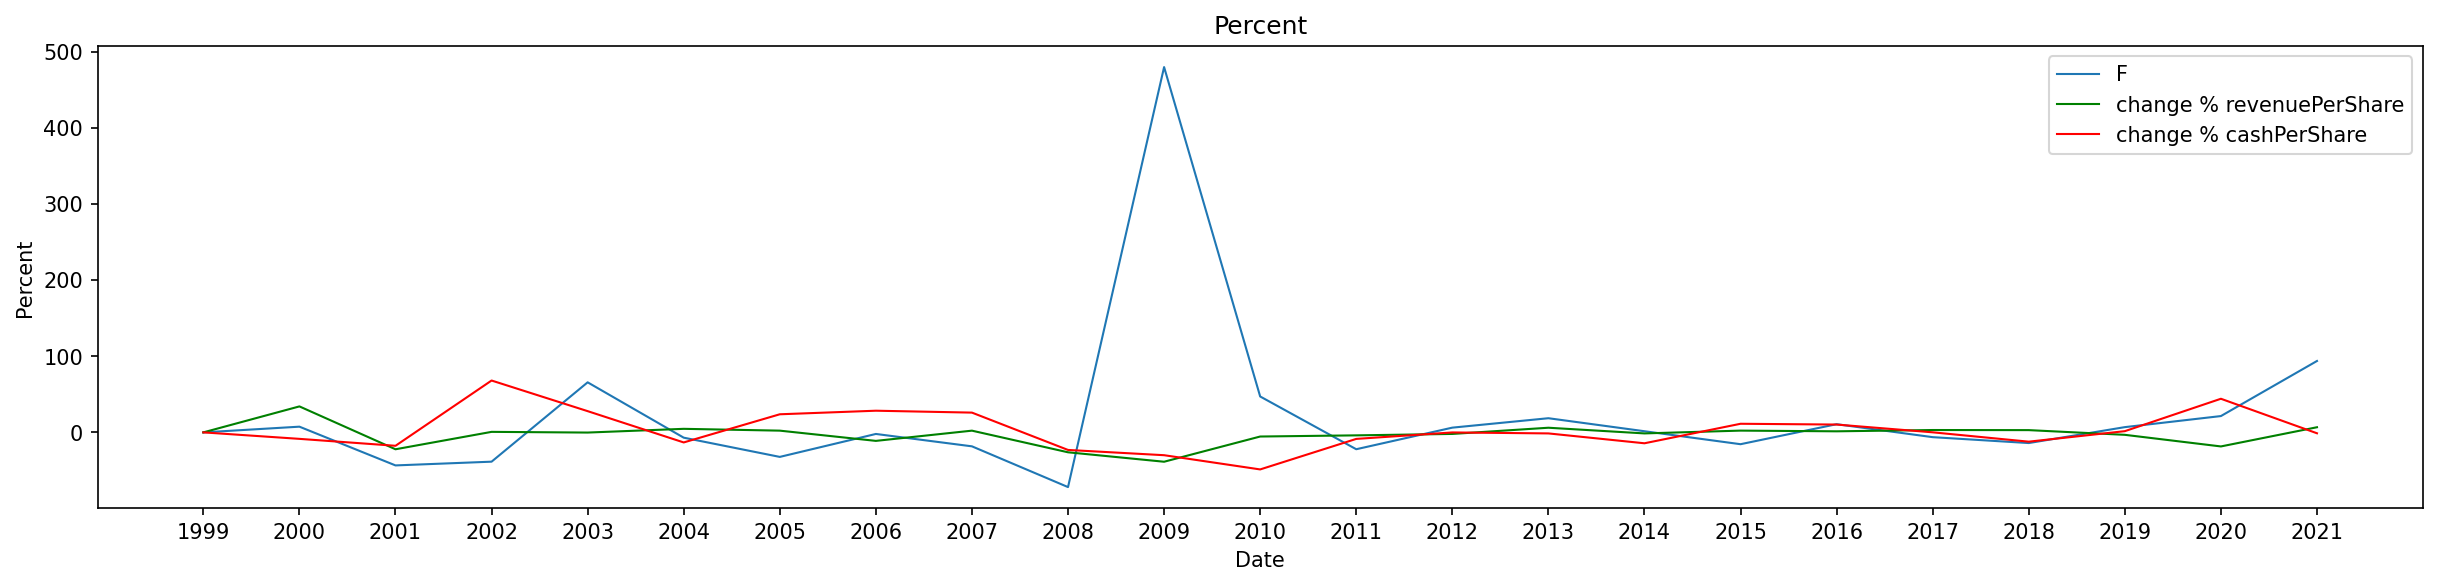

In [23]:
# plot size
figure(figsize=(20,4), dpi=150)


# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


# Plot 
plt.plot(df_with_changes_key[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes_key[x],'g',lw=1, label=x)
plt.plot(df_with_changes_key[y],'r', lw=1, label=y)

# Add a legend to the axis
plt.legend()

plt.show()

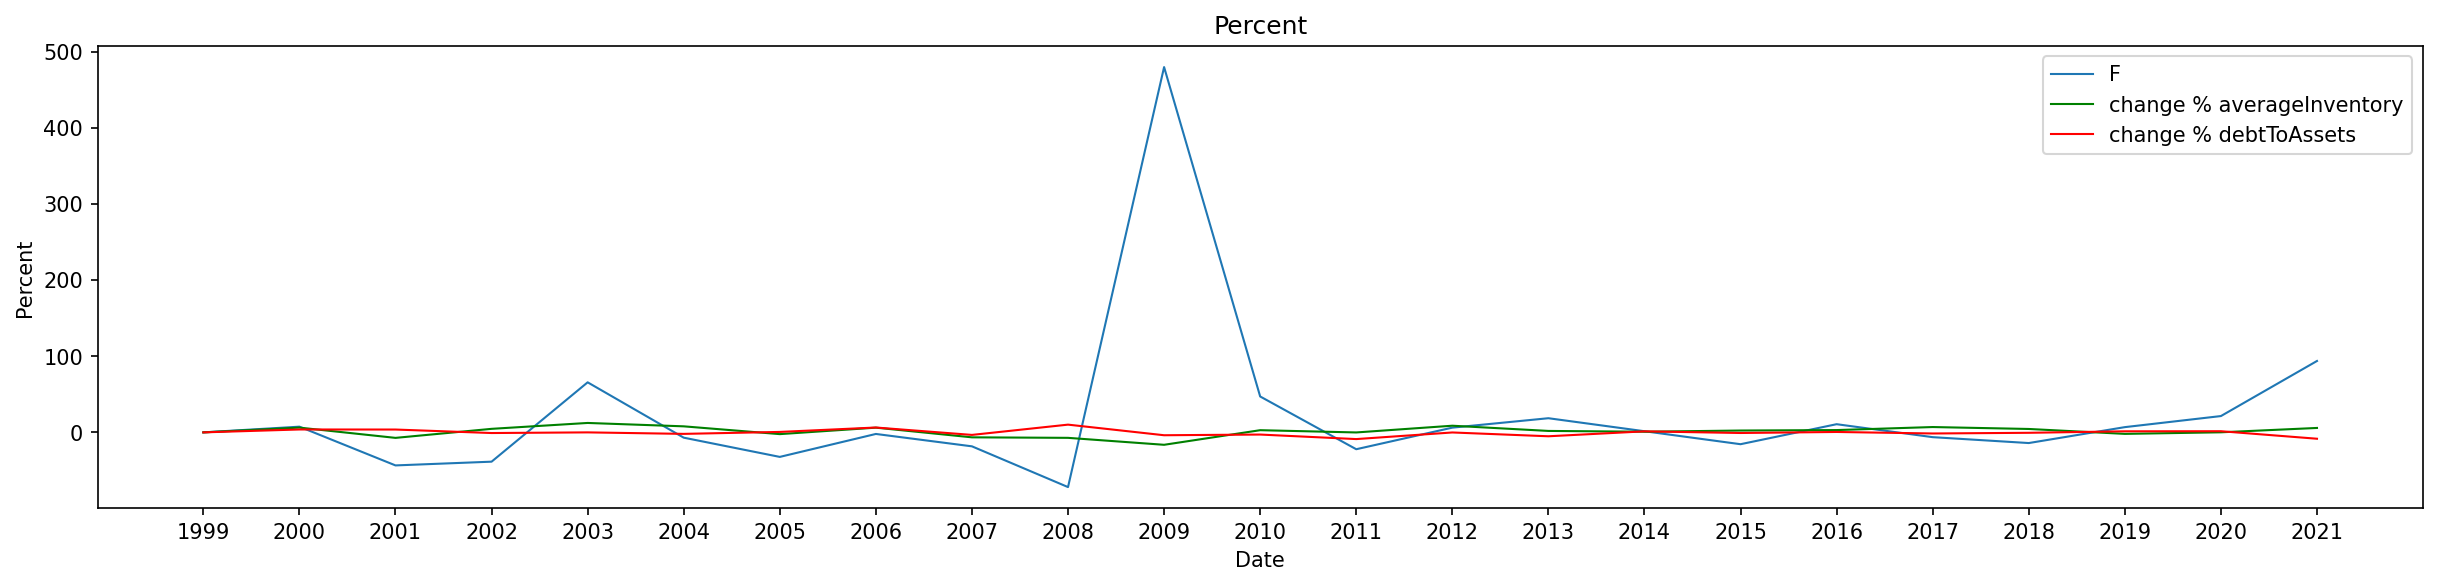

In [24]:
# plot size
figure(figsize=(20,4), dpi=150)

plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')




# Plot close price and moving averages
plt.plot(df_with_changes_key[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes_key[z],'g',lw=1, label=z)
plt.plot(df_with_changes_key[e],'r', lw=1, label=e)

# Add a legend to the axis
plt.legend()

plt.show()

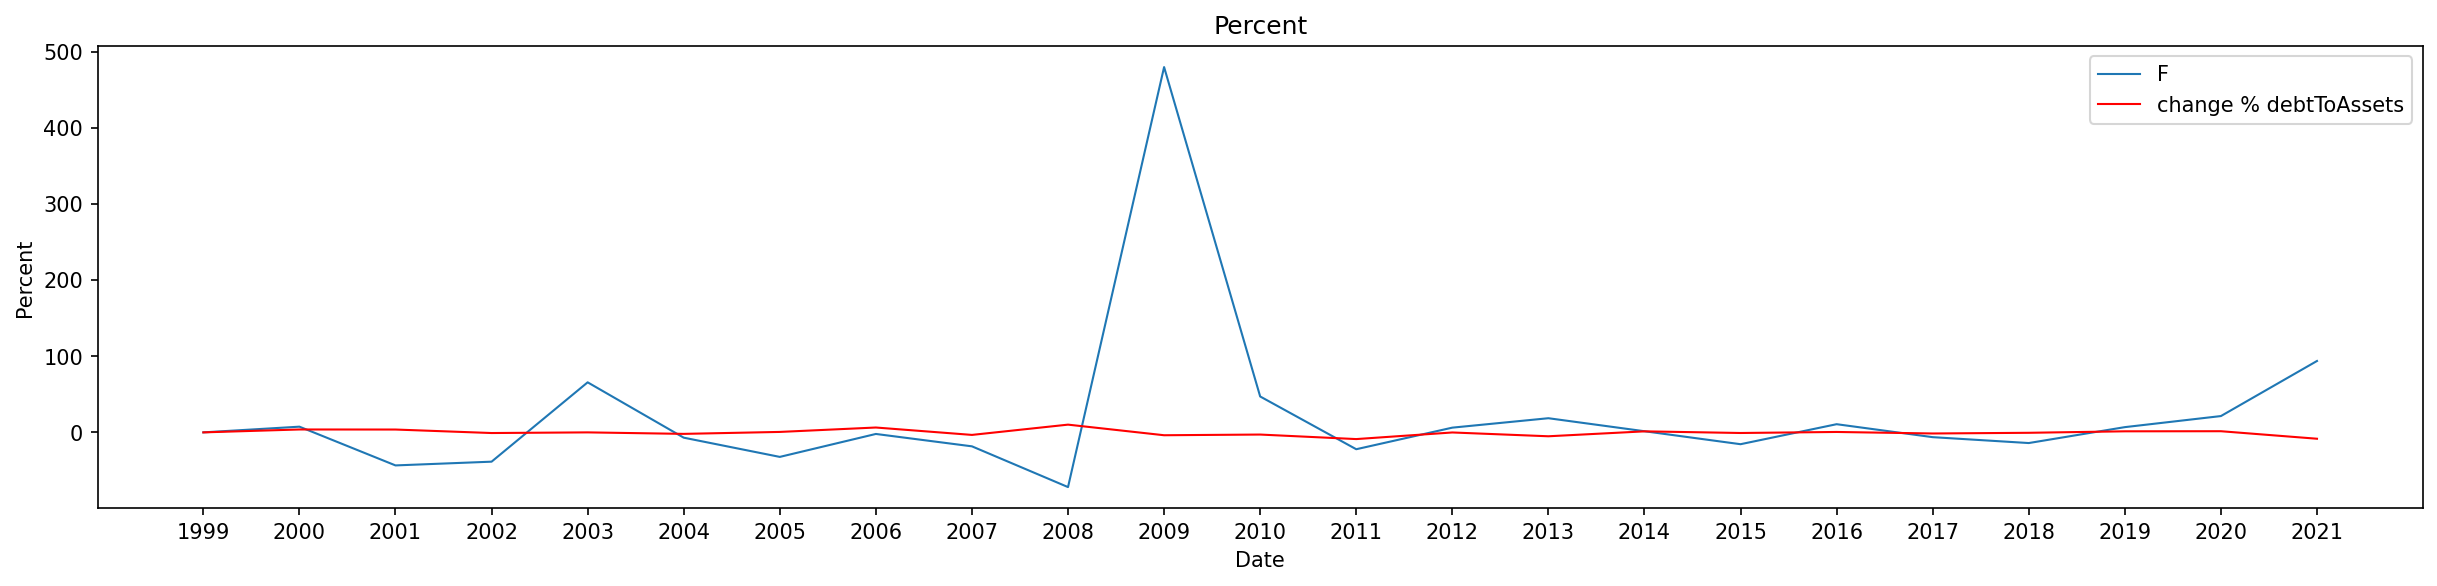

In [25]:
# plot size
figure(figsize=(20,4), dpi=150)


plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')




# Plot close price and moving averages
plt.plot(df_with_changes_key[f'change % {ticker}'],lw=1, label=ticker)
# plt.plot(df_with_changes_key[z1],'g',lw=1, label=z1)
plt.plot(df_with_changes_key[e1],'r', lw=1, label=e1)

# Add a legend to the axis
plt.legend()

plt.show()

In [26]:
df_inc_stat.head(3)

,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,operatingExpenses,costAndExpenses,interestIncome,interestExpense,depreciationAndAmortization,ebitda,ebitdaratio,operatingIncome,operatingIncomeRatio,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink,F,SNP,change % reportedCurrency,change % cik,change % fillingDate,change % acceptedDate,change % calendarYear,change % period,change % revenue,change % costOfRevenue,change % grossProfit,change % grossProfitRatio,change % researchAndDevelopmentExpenses,change % generalAndAdministrativeExpenses,change % sellingAndMarketingExpenses,change % sellingGeneralAndAdministrativeExpenses,change % otherExpenses,change % operatingExpenses,change % costAndExpenses,change % interestIncome,change % interestExpense,change % depreciationAndAmortization,change % ebitda,change % ebitdaratio,change % operatingIncome,change % operatingIncomeRatio,change % totalOtherIncomeExpensesNet,change % incomeBeforeTax,change % incomeBeforeTaxRatio,change % incomeTaxExpense,change % netIncome,change % netIncomeRatio,change % eps,change % epsdiluted,change % weightedAverageShsOut,change % weightedAverageShsOutDil,change % link,change % finalLink,change % F,change % SNP
2021,USD,0000037996,2022-02-04,2022-02-03 18:24:07,2021,FY,136341000000,114651000000,21690000000,0.159086,0,0,0,11915000000,0,11915000000,126566000000,261000000,7055000000,5960000000,30822000000,0.226066,4523000000,0.033174,13257000000,17780000000,0.130408,-130000000,17937000000,0.13156,4.49,4.45,3991000000,4034000000,https://www.sec.gov/Archives/edgar/data/37996/...,https://www.sec.gov/Archives/edgar/data/37996/...,19.659067,4515.549805,0,0,0,0,0,0,7.233530,1.684227,50.708727,40.542540,0,0.0,0,16.893947,0.0,16.893947,2.945219,-42.000000,-31.210998,-20.075097,85.741834,73.212458,Plus,Plus,302.703524,Plus,Plus,Minus,Plus,Plus,Plus,Plus,0.453058,1.535364,0,0,93.753247,21.573991
2020,USD,0000037996,2021-02-05,2021-02-04 18:58:09,2020,FY,127144000000,112752000000,14392000000,0.113194,0,0,0,10193000000,0,10193000000,122945000000,450000000,10256000000,7457000000,16594000000,0.130513,-4408000000,-0.034669,3292000000,-1116000000,-0.008777,160000000,-1279000000,-0.010059,-0.32,-0.32,3973000000,3973000000,https://www.sec.gov/Archives/edgar/data/37996/...,https://www.sec.gov/Archives/edgar/data/37996/...,10.146445,3714.239990,0,0,0,0,0,0,-18.445157,-16.289636,-32.135616,-16.786812,0,0.0,0,-8.673058,0.0,-8.673058,-15.706803,-44.375773,-2.518772,-12.167256,-9.490564,10.979842,Minus,Minus,Plus,74.375,113.813176,Plus,Minus,Minus,Minus,Minus,0.025176,-0.774226,0,0,21.418138,15.151664
2019,USD,0000037996,2020-02-05,2020-02-05 12:01:22,2019,FY,155900000000,134693000000,21207000000,0.13603,0,0,0,11161000000,0,11161000000,145854000000,809000000,10521000000,8490000000,18334000000,0.117601,574000000,0.003682,-1214000000,-640000000,-0.004105,-724000000,47000000,0.000301,0.01,0.01,3972000000,4004000000,https://www.sec.gov/Archives/edgar/data/37996/...,https://www.sec.gov/Archives/edgar/data/37996/...,8.356614,3225.520020,0,0,0,0,0,0,-2.767903,-1.156536,-11.890814,-9.382613,0,0.0,0,-2.122249,0.0,-2.122249,-1.231107,15.571429,-1.590123,2.190660,-21.401012,-19.163537,-95.468183,-95.339175,-85.410407,Minus,Minus,Minus,-98.721784,-98.685397,-98.924731,-98.913043,0.461246,0.181670,0,0,6.881492,19.282567


Vizualization income_statement

In [27]:
''' necessary columns '''

is0 = f'{ticker}'
is1 = f'change % {ticker}'
is2 = 'SNP'
is3 = 'change % SNP'
is4 =  'revenue'
is5 =  'costOfRevenue'
is6 =  'grossProfit'
is7 =  'grossProfitRatio'
is8 =  'researchAndDevelopmentExpenses'
is9 =  'sellingGeneralAndAdministrativeExpenses'
is10 =  'operatingExpenses'
is11 =  'costAndExpenses'
is12 =  'interestIncome'
is13 =  'interestExpense'
is14 =  'depreciationAndAmortization'
is15 =  'ebitda'
is16 =  'ebitdaratio'
is17 =  'operatingIncome'
is18 =  'operatingIncomeRatio'
is19 =  'totalOtherIncomeExpensesNet'
is20 =  'incomeBeforeTax'
is21 =  'incomeBeforeTaxRatio'
is22 =  'incomeTaxExpense'
is23 =  'netIncome'
is24 =  'netIncomeRatio'
is25 =  'eps'
is26 =  'epsdiluted'
is27 =  'weightedAverageShsOut'
is28 =  'weightedAverageShsOutDil'
is29 =  'change % revenue'
is30 =  'change % costOfRevenue'
is31 =  'change % grossProfit'
is32 =  'change % grossProfitRatio'
is33 =  'change % researchAndDevelopmentExpenses'
is34 =  'change % generalAndAdministrativeExpenses'
is35 =  'change % sellingAndMarketingExpenses'
is36 =  'change % sellingGeneralAndAdministrativeExpenses'
is37 =  'change % otherExpenses'
is38 =  'change % operatingExpenses'
is39 =  'change % costAndExpenses'
is40 =  'change % interestIncome'
is41 =  'change % interestExpense'
is42 =  'change % depreciationAndAmortization'
is43 =  'change % ebitda'
is44 =  'change % ebitdaratio'
is45 =  'change % operatingIncome'
is46 =  'change % operatingIncomeRatio'
is47 =  'change % totalOtherIncomeExpensesNet'
is48 =  'change % incomeBeforeTax'
is49 =  'change % incomeBeforeTaxRatio'
is50 =  'change % incomeTaxExpense'
is51 =  'change % netIncome'
is52 =  'change % netIncomeRatio'
is53 =  'change % eps'
is54 =  'change % epsdiluted'
is55 =  'change % weightedAverageShsOut'
is56 =  'change % weightedAverageShsOutDil'

In [28]:
df_with_changes_inc_stat = df_with_changes_inc_stat.reindex(index=df_with_changes_inc_stat.index[::-1])

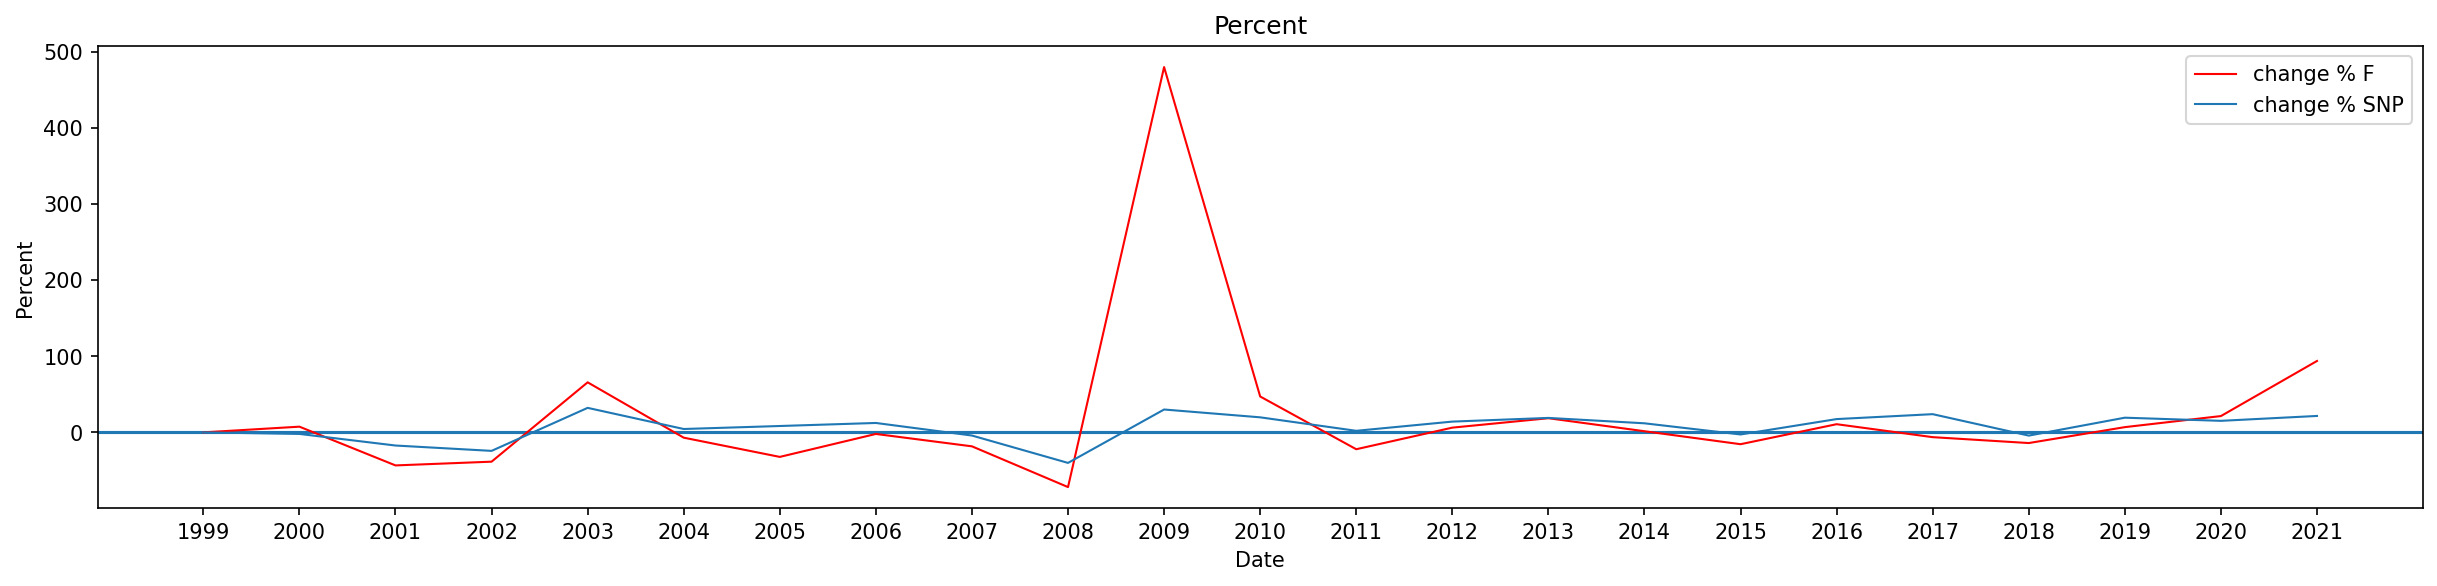

In [29]:

# plot size
figure(figsize=(20,4), dpi=150)

plt.axhline(y=0, linestyle='-')

# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


# Plot 
# plt.plot(df_with_changes_inc_stat[is0],lw=1, label=is0)
plt.plot(df_with_changes_inc_stat[is1],'r',lw=1, label=is1)
# plt.plot(df_with_changes_inc_stat[is2],'g',lw=1, label=is2)
plt.plot(df_with_changes_inc_stat[is3], lw=1, label=is3)

# Add a legend to the axis
plt.legend()

plt.show()

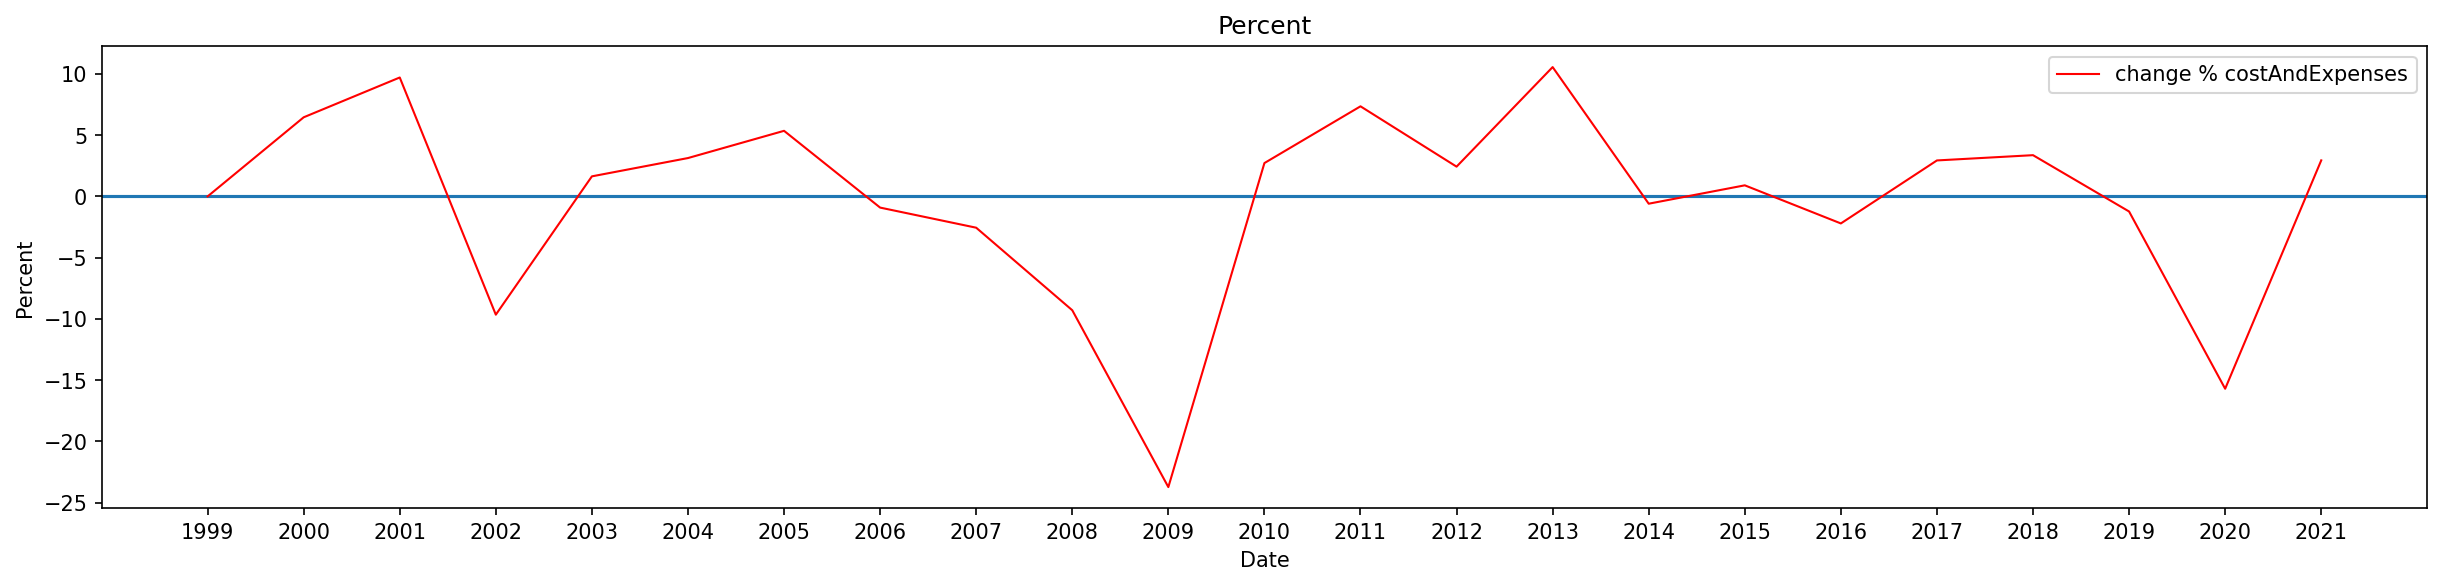

In [30]:
# plot size
figure(figsize=(20,4), dpi=150)

plt.axhline(y=0, linestyle='-')

# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')




# Plot 

# plt.plot(df_with_changes_inc_stat[is16],'r', lw=1, label=is16)
# plt.plot(df_with_changes_inc_stat[is38],'g', lw=1, label=is38)
plt.plot(df_with_changes_inc_stat[is39],'r', lw=1, label=is39)
# plt.plot(df_with_changes_inc_stat[is40],'b', lw=1, label=is40)
# plt.plot(df_with_changes_inc_stat[is41],'g', lw=1, label=is41)
# plt.plot(df_with_changes_inc_stat[is42],'y', lw=1, label=is42)
# Add a legend to the axis
plt.legend()

plt.show()

dividents results

In [31]:
# stock_dividend = fa.stock_dividend(ticker, api_key)


# def get_date_dividents(df):
#     df_index = df.index.to_list()
#     for i in range(len(df_index)):
#         t = df_index[i][0:4]
#         df_index[i] = t
        
        

#     df['Date_index'] = df_index
#     df = df.set_index('Date_index')
#     return df

# df_dividents = get_date_dividents(stock_dividend)
# # df_dividents

# df_dividents = df_dividents.loc[filt_finish_date:filt_start_date].copy(deep=True)


math

In [32]:
sum_div

70.0786346181506

In [33]:
df_with_changes_inc_stat[f'change % {ticker}'].sum()

487.9221558027276

In [34]:
df_with_changes_inc_stat[f'change % {ticker}'].sum()+sum_div

558.0007904208783

In [35]:
df_with_changes_inc_stat['change % eps'].sum()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
df_dividents